# Matplotlib

## 1.基本认识

### Figure
在任何绘图之前，我们需要一个Figure对象，可以理解成我们需要一张画板才能开始绘图。

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

### Axes
在拥有Figure对象之后，在作画前我们还需要轴，没有轴的话就没有绘图基准，所以需要添加Axes。也可以理解成为真正可以作画的纸。

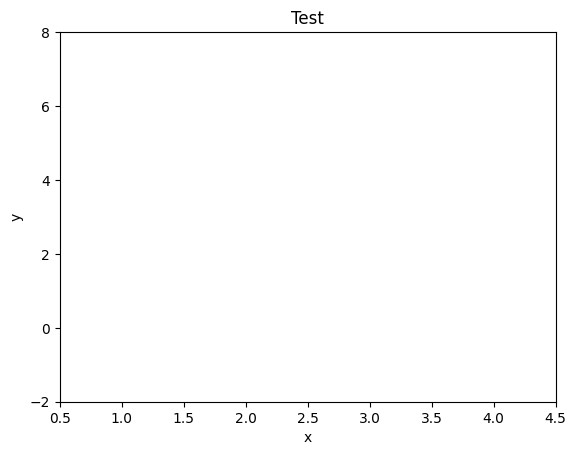

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title="Test", ylabel="y", xlabel="x")
plt.show()

对于上面的fig.add_subplot(111)就是添加Axes的，参数的解释的在画板的第1行第1列的第一个位置生成一个Axes对象来准备作画。也可以通过fig.add_subplot(2, 2, 1)的方式生成Axes，前面两个参数确定了面板的划分，例如 2， 2会将整个面板划分成 2 * 2 的方格，第三个参数取值范围是 [1, 2*2] 表示第几个Axes。如下面的例子：

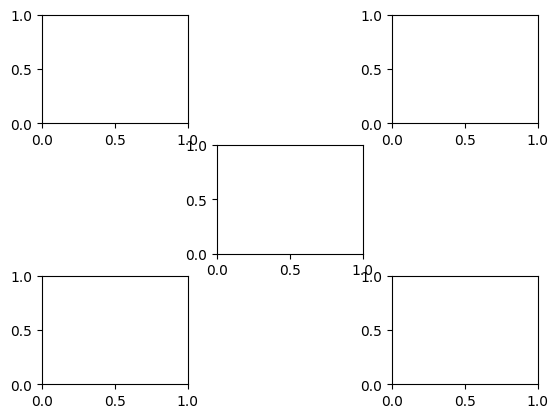

In [9]:
fig = plt.figure()
ax = fig.add_subplot(331)
ax = fig.add_subplot(333)
ax = fig.add_subplot(335)
ax = fig.add_subplot(337)
ax = fig.add_subplot(339)

### Multiple Axes
可以发现我们上面添加 Axes 似乎有点弱鸡，所以提供了下面的方式一次性生成所有 Axes：

[Text(0.5, 1.0, '1')]

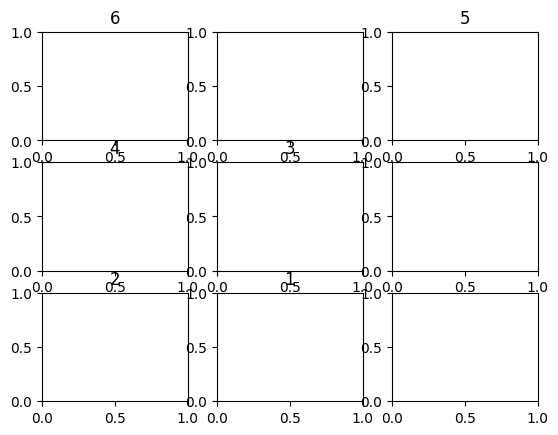

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3)
ax[0, 0].set(title="6")
ax[0, 2].set(title="5")
ax[1, 0].set(title="4")
ax[1, 1].set(title="3")
ax[2, 0].set(title="2")
ax[2, 1].set(title="1")

### Axes Vs .pyplot
相信不少人看过下面的代码，很简单并易懂，但是下面的作画方式只适合简单的绘图，快速的将图绘出。在处理复杂的绘图工作时，我们还是需要使用 Axes 来完成作画的。

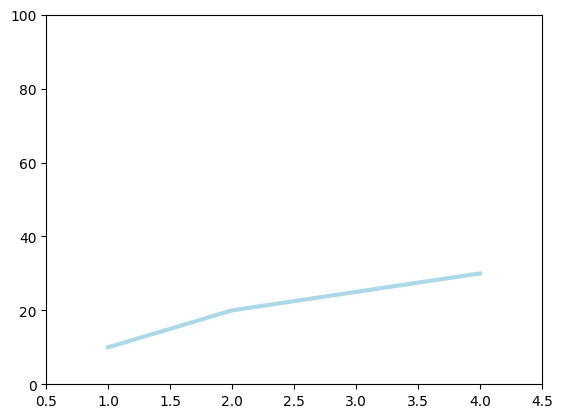

In [17]:
plt.plot([1,2,3,4], [10., 20, 25, 30], color='lightblue', linewidth=3)
plt.xlim(0.5, 4.5)
plt.ylim(0, 100)
plt.show()

## 基本绘图2d

### 线
plot()函数画出一系列的点，并且用线将它们连接起来。看下例子：

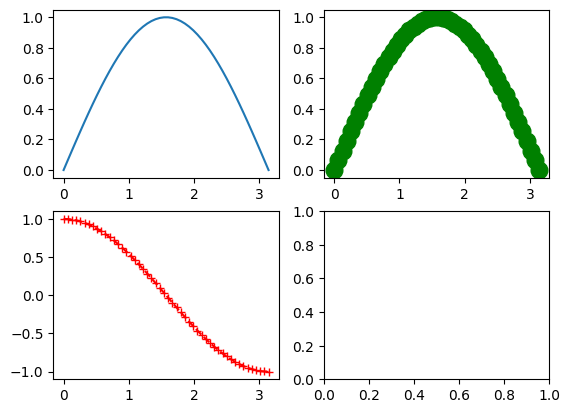

In [26]:
import numpy as np
x = np.linspace(0, np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig, ax1 = plt.subplots(nrows=2, ncols=2)
ax1[0, 0].plot(x, y_sin)
ax1[0, 1].plot(x, y_sin, 'go--', linewidth=2, markersize=12)
ax1[1, 0].plot(x, y_cos, color='red', marker='+', linestyle='dashed')

另外，我们可以通过关键字参数的方式绘图，如下例：

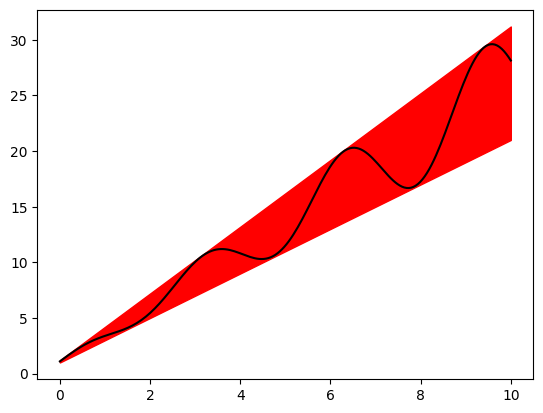

In [27]:
x = np.linspace(0, 10, 200)
data_obj = {
    'x': x,
    'y1': 2 * x + 1,
    'y2': 3 * x + 1.2,
    'mean': 0.5 * x * np.cos(2*x) + 2.5*x + 1.1
}
fig, ax = plt.subplots()

ax.fill_between('x', 'y1', 'y2', color="red", data=data_obj)

ax.plot('x', 'mean', color='black', data=data_obj)

发现上面的作图，在数据部分只传入了字符串，这些字符串对一个这 data_obj 中的关键字，当以这种方式作画时，将会在传入给 data 中寻找对应关键字的数据来绘图。

### 散点图
只画点，但是不用线连接起来

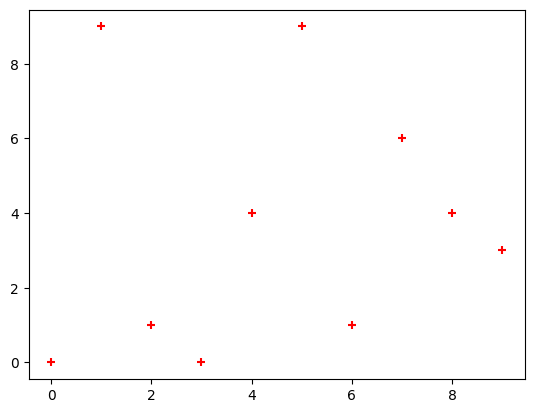

In [37]:
x = np.arange(10)
y = np.random.randint(0, 10, 10)
y
plt.scatter(x, y, color='red', marker='+')
plt.show()

### 条形图
条形图分两种，一种是水平的，一种是垂直的，见下例子：

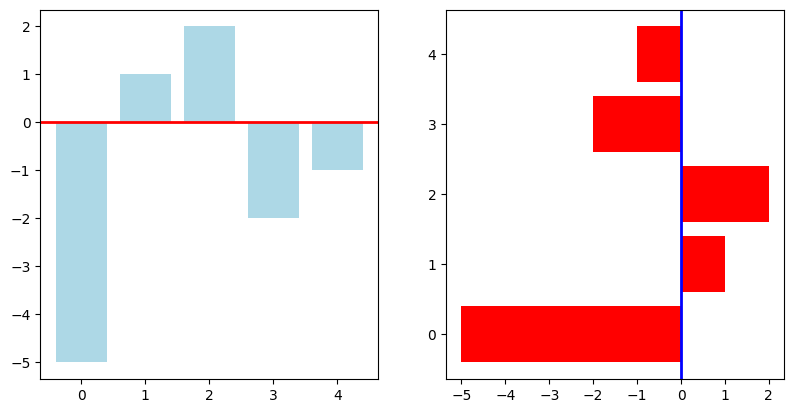

In [48]:
np.random.seed(1)
x=np.arange(5)
y=np.random.randint(-10, 10, 5)
fig, ax = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = ax[0].bar(x, y, color='lightblue', align='center')
horiz_bars = ax[1].barh(x, y, color='red', align='center')

ax[0].axhline(0, color='red', linewidth=2)
ax[1].axvline(0, color='blue', linewidth=2)
plt.show()

条形图还返回了一个Artists 数组，对应着每个条形，例如上图 Artists 数组的大小为5，我们可以通过这些 Artists 对条形图的样式进行更改，如下例：

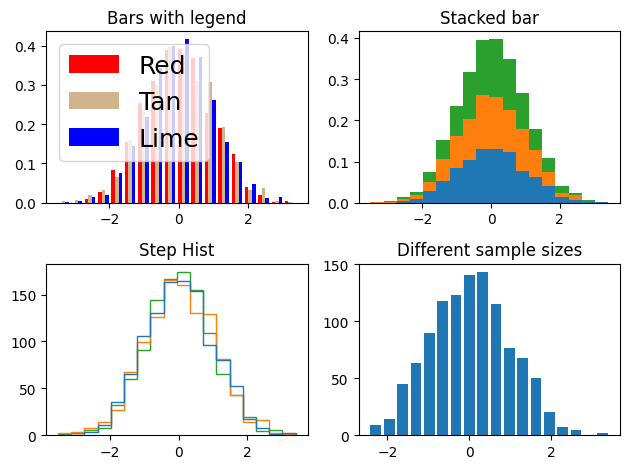

In [56]:
# 创建一个 2x2 的子图，绘制不同类型的直方图
np.random.seed(19688881)
x = np.random.randn(1088, 3)  # 生成 1088 行 3 列的随机数据

# 创建子图
fig, axes = plt.subplots(nrows=2, ncols=2)

# 访问每个子图并绘制直方图
axes = axes.flatten()  # 将子图数组展平成一维数组

# 第一种直方图：普通条形图
axes[0].hist(x, bins=18, density=True, histtype='bar', color=['red', 'tan', 'blue'], label=['Red', 'Tan', 'Lime'])
axes[0].legend(prop={'size': 18})
axes[0].set_title('Bars with legend')

# 第二种直方图：堆叠条形图
axes[1].hist(x, bins=18, density=True, histtype='barstacked')
axes[1].set_title('Stacked bar')

# 第三种直方图：带有宽度设置的条形图
axes[2].hist(x, bins=18, histtype='step', rwidth=0.8)
axes[2].set_title('Step Hist')

# 第四种直方图：不同样本大小的直方图
axes[3].hist(x[:, 0], bins=18, rwidth=0.8)
axes[3].set_title('Different sample sizes')

# 自动调整子图布局
fig.tight_layout()

# 显示图形
plt.show()


参数中density控制Y轴是概率还是数量，与返回的第一个的变量对应。histtype控制着直方图的样式，默认是 ‘bar’，对于多个条形时就相邻的方式呈现如子图1， ‘barstacked’ 就是叠在一起，如子图2、3。 rwidth 控制着宽度，这样可以空出一些间隙，比较图2、3. 图4是只有一条数据时

### 饼图

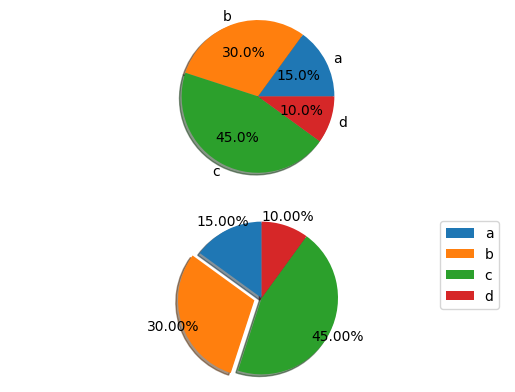

In [65]:
labels = ['a', 'b', 'c', 'd']
size =  [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)

fig1, (ax1, ax2) = plt.subplots(2)
ax1.pie(size, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

ax2.pie(size, autopct='%1.2f%%', shadow=True, startangle=90, explode=explode, pctdistance=1.12)
ax2.axis('equal')
ax2.legend(labels=labels, loc='upper right')

plt.show()

饼图自动根据数据的百分比画饼.。labels是各个块的标签，如子图一。autopct=%1.1f%%表示格式化百分比精确输出，explode，突出某些块，不同的值突出的效果不一样。pctdistance=1.12百分比距离圆心的距离，默认是0.6.

### 箱形图
为了专注于如何画图，省去数据的处理部分。 data 的 shape 为 (n, )， data2 的 shape 为 (n, 3)。

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2b98e3040>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2b98e3a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2b98e3bb0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d2b9a50850>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d2b9a50250>,
 'means': []}

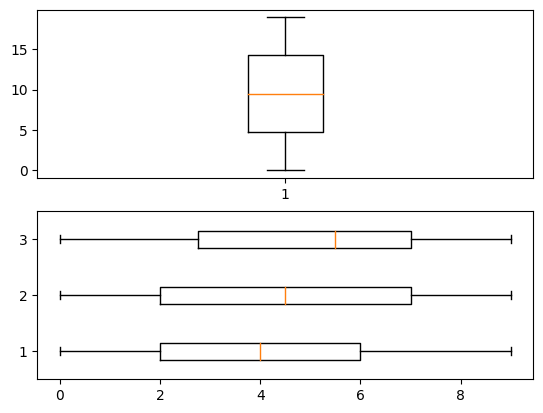

In [70]:
data = np.arange(20)
data2 = np.random.randint(0, 10, size=(20, 3))
data2
fig, ax = plt.subplots(2)
ax[0].boxplot(data)
ax[1].boxplot(data2, vert=False)

### 泡泡图
散点图的一种，加入了第三个值 s 可以理解成普通散点，画的是二维，泡泡图体现了Z的大小，如下例：

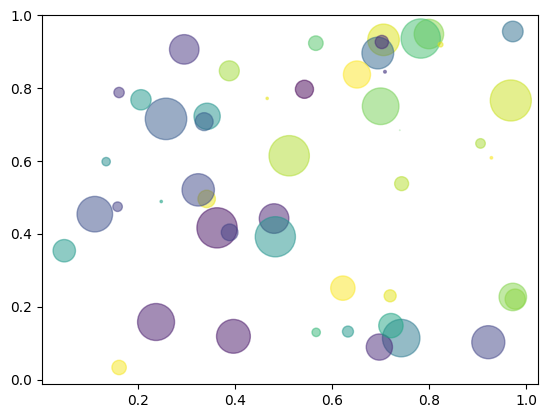

In [75]:
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### 等高线（轮廓图）
有时候需要描绘边界的时候，就会用到轮廓图，机器学习用的决策边界也常用轮廓图来绘画，见下例：

100


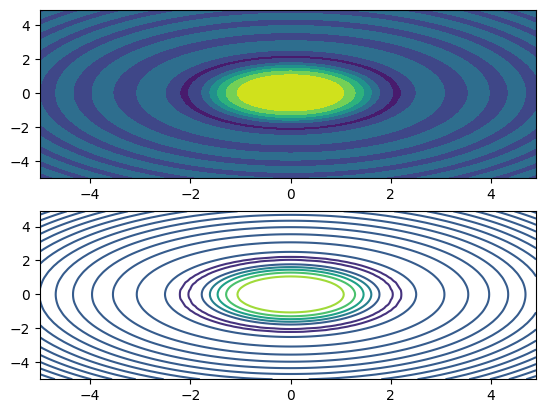

In [83]:
fig, ax = plt.subplots(2)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
print(len(xx[0]))
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
ax[0].contourf(x, y, z)
ax[1].contour(x, y, z)

上面画了两个一样的轮廓图，contourf会填充轮廓线之间的颜色。数据x, y, z通常是具有相同 shape 的二维矩阵。x, y 可以为一维向量，但是必需有 z.shape = (y.n, x.n) ，这里 y.n 和 x.n 分别表示x、y的长度。Z通常表示的是距离X-Y平面的距离，传入X、Y则是控制了绘制等高线的范围。

## 布局、图例说明、边界等

### 区间上下限
当绘画完成后，会发现X、Y轴的区间是会自动调整的，并不是跟我们传入的X、Y轴数据中的最值相同。为了调整区间我们使用下面的方式：

In [85]:
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.axis([xmin, xmax, ymin,ymax])
ax.set_ylim(bottom=-10)
ax.set_xlim(right=25)

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

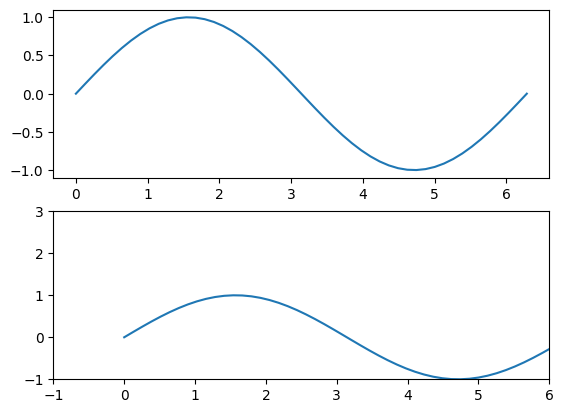

In [87]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x, y)
ax2.plot(x, y)
ax2.set_xlim([-1, 6])
ax2.set_ylim([-1, 3])
plt.show()

### 图例说明
我们如果我们在一个Axes上做多次绘画，那么可能出现分不清哪条线或点所代表的意思。这个时间添加图例说明，就可以解决这个问题了，见下例：

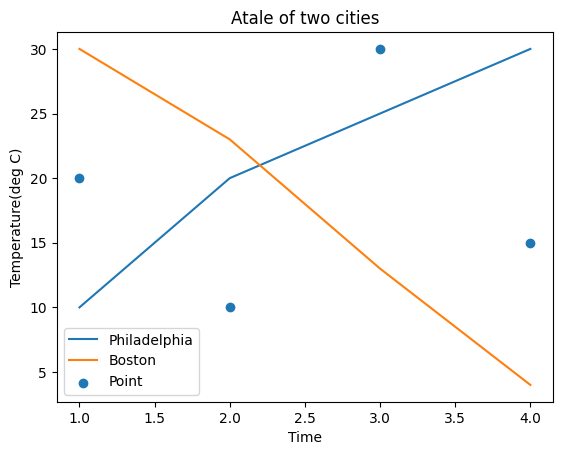

In [88]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25,30],label='Philadelphia')
ax.plot([1,2, 3,4],[30,23,13,4],label='Boston')
ax.scatter([1,2,3,4],[20,10,30,15],label='Point')
ax.set(ylabel='Temperature(deg C)',xlabel='Time',title='Atale of two cities')
ax.legend()
plt.show()

在绘图时传入 label 参数，并最后调用ax.legend()显示体力说明，对于 legend 还是传入参数，控制图例说明显示的位置：
| Location String    | Location Code |
|--------------------|--------------|
| ‘best’            | 0            |
| ‘upper right’     | 1            |
| ‘upper left’      | 2            |
| ‘lower left’      | 3            |
| ‘lower right’     | 4            |
| ‘right’           | 5            |
| ‘center left’     | 6            |
| ‘center right’    | 7            |
| ‘lower center’    | 8            |
| ‘upper center’     | 9            |
| ‘center’          | 10           |

### 区间分段
默认情况下，绘图结束之后，Axes 会自动的控制区间的分段。见下例：

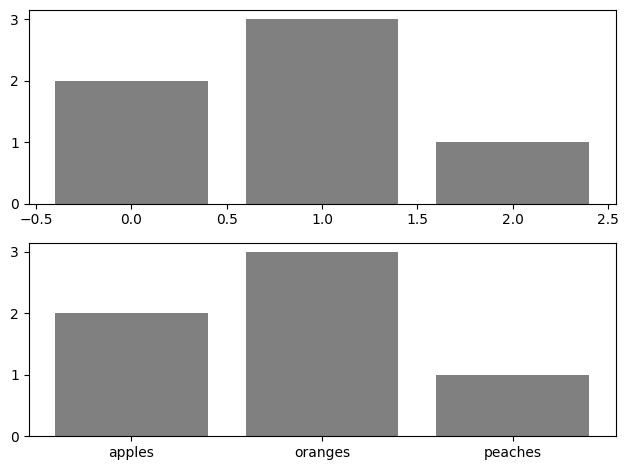

In [93]:

data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(len(fruit))

ax1.bar(x, value, align='center', color='gray')
ax2.bar(x, value, align='center', color='gray')

ax2.set(xticks=x, xticklabels=fruit)

plt.tight_layout()
plt.show()


### 布局
当我们绘画多个子图时，就会有一些美观的问题存在，例如子图之间的间隔，子图与画板的外边间距以及子图的内边距，下面说明这个问题：

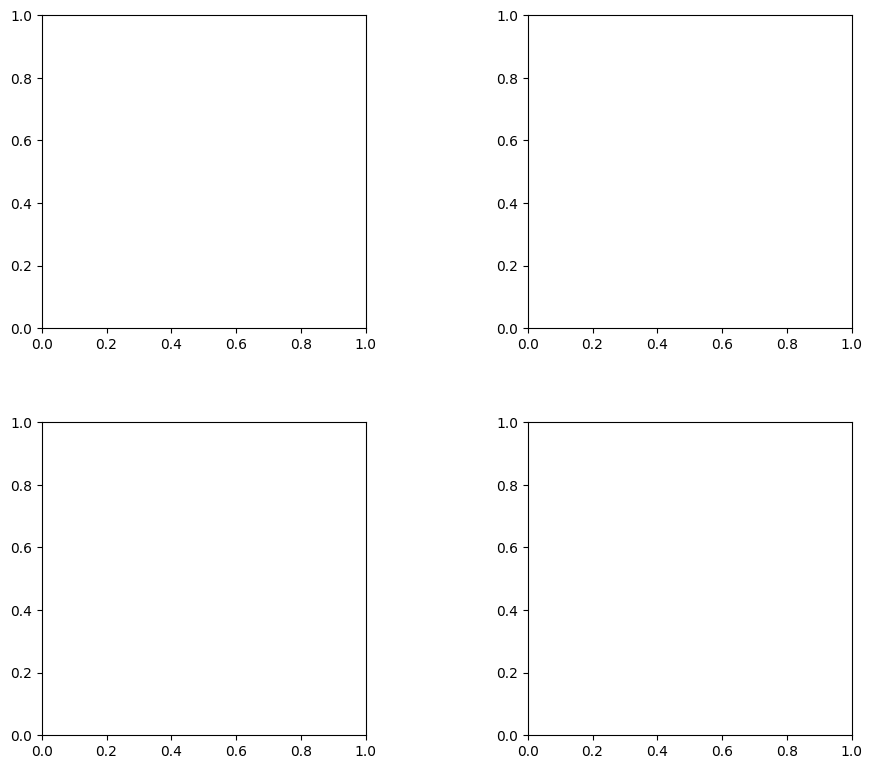

In [109]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.1, right=1.0,
                    top=0.9,    bottom=0.1)

# fig.tight_layout()  # 自动调整布局，使标题之间不重叠
plt.show()


通过fig.subplots_adjust()我们修改了子图水平之间的间隔wspace=0.5，垂直方向上的间距hspace=0.3，左边距left=0.125 等等，这里数值都是百分比的。以 [0, 1] 为区间，选择left、right、bottom、top 注意 top 和 right 是 0.9 表示上、右边距为百分之10。不确定如果调整的时候，fig.tight_layout()是一个很好的选择。之前说到了内边距，内边距是子图的，也就是 Axes 对象，所以这样使用 ax.margins(x=0.1, y=0.1)，当值传入一个值时，表示同时修改水平和垂直方向的内边距。

### 轴相关
改变边界的位置，去掉四周的边框：

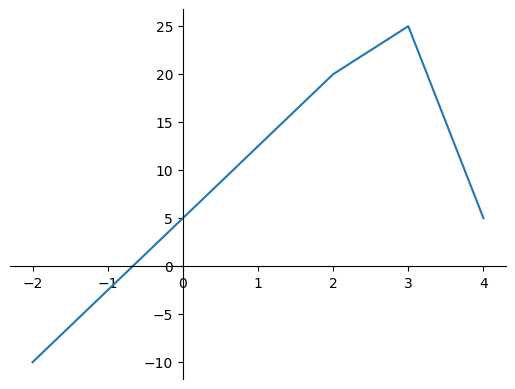

In [133]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)    # 顶边界不可见
# ax.xaxis.set_ticks_position('bottom')  # ticks 的位置为下方
ax.spines['right'].set_visible(False)   # 右边界不可见
# ax.yaxis.set_ticks_position('left')    # y轴的刻度在左边

# "outward"
# 移动左、下边界离 Axes 10 个距离
# ax.spines['bottom'].set_position(('outward', 10))
# ax.spines['left'].set_position(('outward', 10))

# "data"
# 移动左、下边界到 (0, 0) 处相交
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# "axes"
# 移动边界，按 Axes 的百分比位置
# ax.spines['bottom'].set_position(('axes', 0.75))
# ax.spines['left'].set_position(('axes', 0.3))

plt.show()
